In [1]:
import os, sys, numpy as np
from mcni.utils import conversion as C
%matplotlib notebook
from matplotlib import pyplot as plt

In [2]:
def compute_fitness(Ei, T0):
    T0Radius=230.;
    SourceToChopper=8.77;
    BeamWidth=62.;
    Curvature=11602.;
    MinChannelWidth=80.;
    T0Edge=[56.,224.];

    IncidentVelocity=np.sqrt(Ei/0.0000052276);
    # % X=57 at Y=224
    PhaseAngleWhite=360.*T0*SourceToChopper/IncidentVelocity;
    PhaseAngleWhite *= np.pi/180.
    WhiteEdgeX1=BeamWidth*np.cos(PhaseAngleWhite)/2+T0Radius*np.sin(PhaseAngleWhite);
    WhiteEdgeY1=-BeamWidth*np.sin(PhaseAngleWhite)/2+T0Radius*np.cos(PhaseAngleWhite);
    WhiteEdgeX2=-BeamWidth*np.cos(PhaseAngleWhite)/2+T0Radius*np.sin(PhaseAngleWhite);
    WhiteEdgeY2=BeamWidth*np.sin(PhaseAngleWhite)/2+T0Radius*np.cos(PhaseAngleWhite);

    BeamX=-224;
    BeamYL=np.sqrt(Curvature**2-BeamX**2)-Curvature-BeamWidth/2;
    BeamYR=np.sqrt(Curvature**2-BeamX**2)-Curvature+BeamWidth/2;
    FitnessParameter1=WhiteEdgeX2-T0Edge[0]
    FitnessParameter1[FitnessParameter1<0] = 0
    FitnessParameter2=np.max(T0Edge[0]-np.abs(BeamYL), 0)
    Fitness=FitnessParameter2*FitnessParameter1;
    # logFitness=np.log(Fitness);
    return Fitness

In [3]:
def optimal_T0_freq(Ei):
    t0_freqs = np.arange(0., 180., 1.)
    fitness = compute_fitness(Ei, t0_freqs)
    return t0_freqs[np.argmax(fitness)]

# fitness vs freq

In [4]:
t0_freqs = np.arange(0., 180., 5.)

<IPython.core.display.Javascript object>


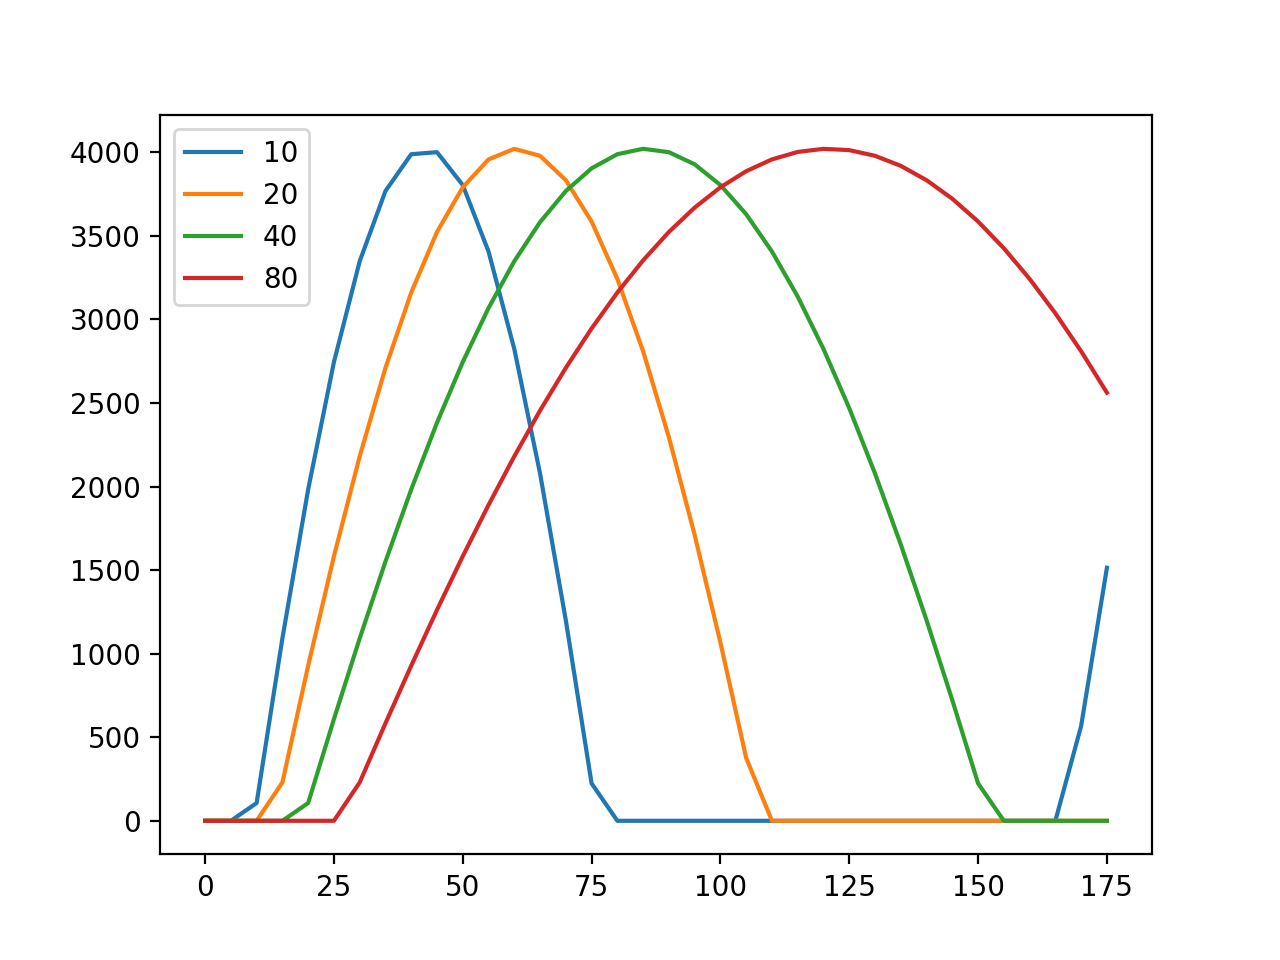

In [5]:
plt.figure()
for Ei in [10, 20, 40, 80]:
    fitness = compute_fitness(Ei, t0_freqs)
    plt.plot(t0_freqs, fitness, label=Ei)
plt.legend()

# log(fitness) vs energy

In [6]:
# compute_fitness(Eis, t0_freq)

<IPython.core.display.Javascript object>


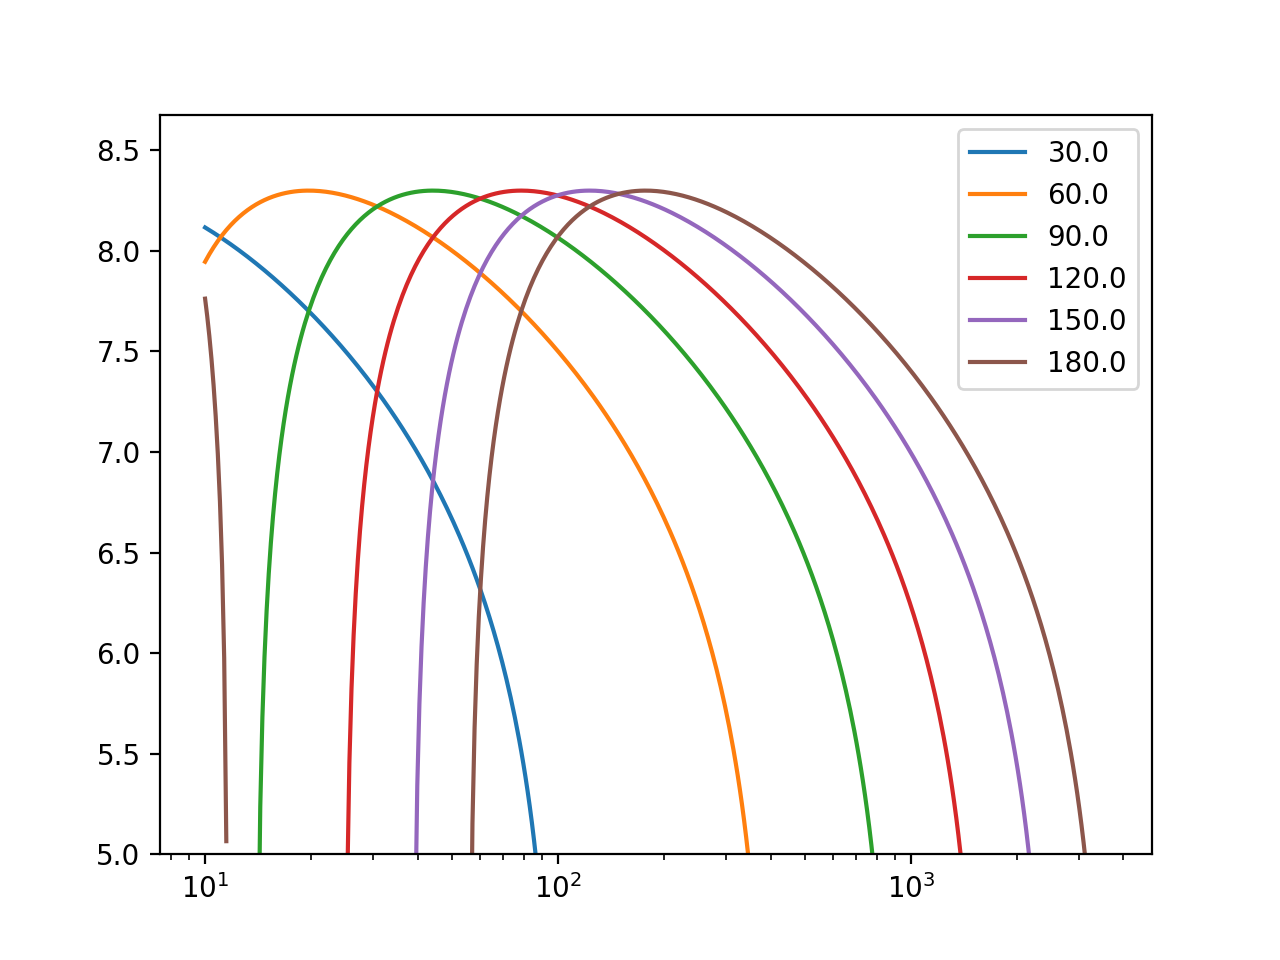

/SNS/software/miniconda2/envs/mcvine-unstable/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log


In [7]:
Eis = np.logspace(1, 4, 500)
plt.figure()
for t0_freq in np.arange(30., 190., 30.):
    fitness = compute_fitness(Eis, t0_freq)
    plt.semilogx(Eis, np.log(fitness), label=t0_freq)
plt.ylim(5, None)
plt.legend()

# optimal freq

In [8]:
print optimal_T0_freq(400.)

179.0
